In [15]:
import pandas as pd
import numpy as np
# pd.set_option...Para ver todas las columnas y decimales de 4 dígitos
pd.set_option('display.max_columns',None)
pd.set_option('display.float_format', lambda x : '%.4f' % x)
import sys
sys.path.append('..')
from SRC import sp_limpieza as sl
from SRC import sp_visual as sv

In [16]:
df=pd.read_csv("../Data/mktgeda_datos_limpios.csv")

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209915 entries, 0 to 209914
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   campaign_id       209915 non-null  int64  
 1   company           194734 non-null  object 
 2   campaign_type     191535 non-null  object 
 3   duration          191309 non-null  float64
 4   channel_used      187421 non-null  object 
 5   conversion_rate   200471 non-null  float64
 6   roi               173439 non-null  float64
 7   location          184543 non-null  object 
 8   language          182907 non-null  object 
 9   clicks            178641 non-null  float64
 10  impressions       188453 non-null  float64
 11  engagement_score  186051 non-null  float64
 12  customer_segment  196763 non-null  object 
 13  date              203007 non-null  object 
 14  total($)          201832 non-null  float64
 15  genre             145058 non-null  object 
 16  ages              18

In [18]:
columnas_num=df.select_dtypes(include=np.number).columns.tolist()
lista_eliminar=['campaign_id','year', 'month','quarter']
for col in lista_eliminar:
  columnas_num.remove(col)
columnas_num

['duration',
 'conversion_rate',
 'roi',
 'clicks',
 'impressions',
 'engagement_score',
 'total($)']

In [19]:
df[columnas_num].describe().T.round(4)

,count,mean,std,min,25%,50%,75%,max
duration,191309.0000,37.5035,16.7443,15.0000,30.0000,30.0000,45.0000,60.0000
conversion_rate,200471.0000,0.0808,0.0410,0.0100,0.0500,0.0808,0.1200,0.1515
roi,173439.0000,27.5304,26.1923,2.0000,5.0100,8.0000,55.0000,88.0000
clicks,178641.0000,275083.8650,330318.3401,100.0000,551.0000,100100.0000,548548.0000,999999.0000
impressions,188453.0000,27542118.3142,33097499.8431,1000.0000,5508.0000,9996.0000,55225522.0000,99999999.0000
engagement_score,186051.0000,77.9064,215.8253,1.0000,5.0000,10.0000,66.0000,1010.0000
total($),201832.0000,12503.9995,4338.1943,5000.0000,8740.0000,12496.0000,16261.0000,20000.0000


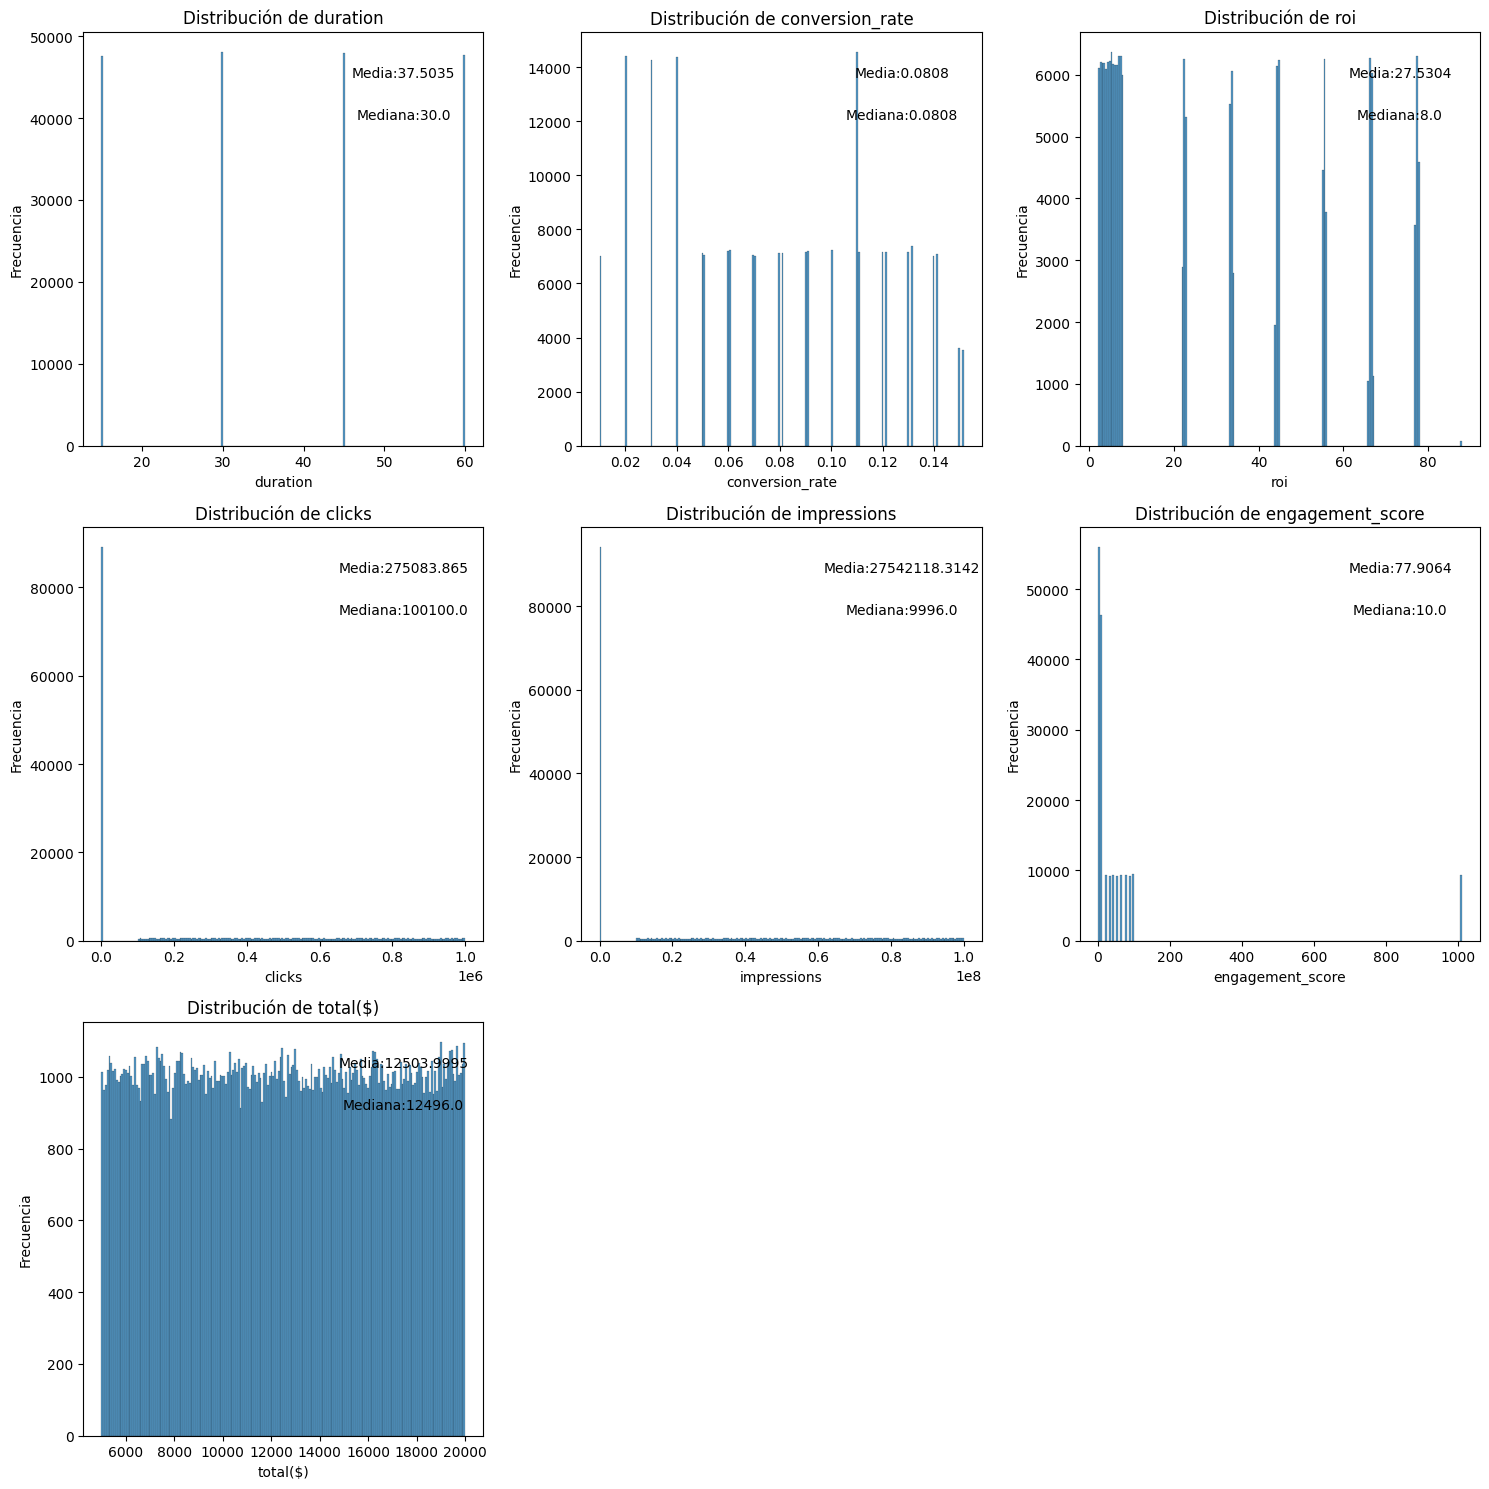

In [20]:
sv.subplot_col_num_hist (df,columnas_num)


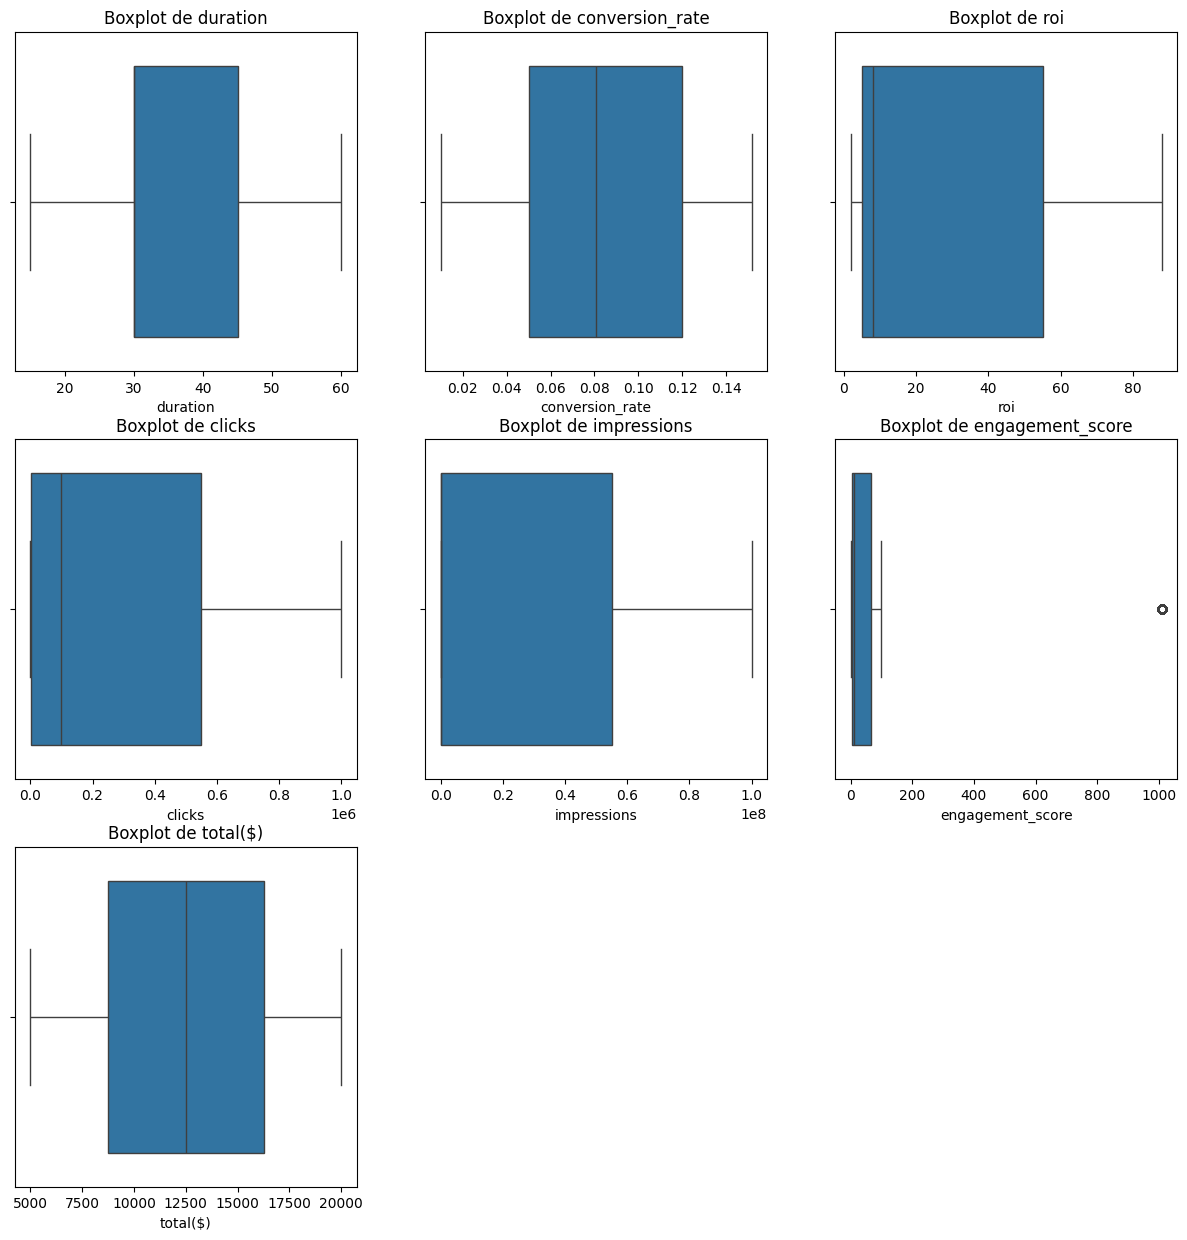

In [21]:
sv.subplot_col_num_boxplot (df,columnas_num)


In [22]:
df['impressions'][df['impressions']>800000000].count()

np.int64(0)

In [23]:
dicc_outliers={'impressions':800000000,
               'clicks':8000000,
               'engagement_score':800}

In [24]:
for col, out in dicc_outliers.items():
  outliers=df[col][df[col]>out].count()
  print(f'Para la columna {col.upper()} tenemos {outliers} outliers, y representa {round(outliers/df.shape[0]*100,3)}% del total')

Para la columna IMPRESSIONS tenemos 0 outliers, y representa 0.0% del total
Para la columna CLICKS tenemos 0 outliers, y representa 0.0% del total
Para la columna ENGAGEMENT_SCORE tenemos 9284 outliers, y representa 4.423% del total


In [25]:
df['clicks'] = df['clicks'].apply(lambda x: np.nan if x > 8000000 else x)
df['impressions'] = df['impressions'].apply(lambda x: np.nan if x > 800000000 else x)

In [26]:
df.to_csv('../Data/mktgeda_datos_limpios.csv',index=False)